# Import data

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_bin_label.csv')
data.drop(columns = 'Rating', inplace = True)

# Analysis of ratings

In [3]:
# Mean of the ratings 
mean_rating = data['rating'].mean()
mean_rating

0.17008952080042128

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

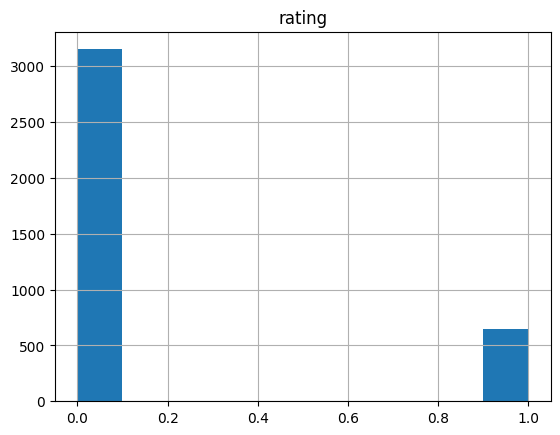

In [4]:
# Distribution of the ratings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data.hist(column='rating')

# Analysis of olfactory notes

In [5]:
# Count the ocurence of each olfactory notes
count = data.sum(axis=0)
df_count_occurrence_notes = pd.DataFrame(count)
df_count_occurrence_notes = df_count_occurrence_notes.drop("rating")
df_count_occurrence_notes.columns = ['occurence']
df_count_occurrence_notes

,occurence
Absinthe_top,0.8
Absolute_base,0.5
Absolute_middle,1.4
Absolute_top,0.2
Accord_base,0.1
...,...
Ylangtincture_top,0.2
Yuzu_middle,0.7
Yuzu_top,6.8
Zefir_top,0.4


In [6]:
df_count_occurrence_notes

,occurence
Absinthe_top,0.8
Absolute_base,0.5
Absolute_middle,1.4
Absolute_top,0.2
Accord_base,0.1
...,...
Ylangtincture_top,0.2
Yuzu_middle,0.7
Yuzu_top,6.8
Zefir_top,0.4


In [7]:
# Check number of olfactory notes
len(df_count_occurrence_notes)

1935

In [8]:
# Occurence of each olfactory notes sorted
df_count_occurrence_notes['occurence'] = pd.to_numeric(df_count_occurrence_notes['occurence'])
df_count_occurrence_notes = df_count_occurrence_notes.sort_values('occurence')
df_count_occurrence_notes

,occurence
Himalayan_base,0.1
Tahitian vanilla_base,0.1
Cappuccino_base,0.1
Candy_base,0.1
Lichen_base,0.1
...,...
Bergamot_top,346.4
Valley_middle,384.3
Lily-of-the-_middle,393.4
Rose_middle,973.0


In [9]:
# Distribution of the number of occurence of olfactory notes
#dis_ol = df_count_occurrence_notes
#plt.hist(dis_ol, bins=150, range = (0,5));
# Conclusion: most of the olfactory notes appear few times (between 0 and 25 times)

In [10]:
df_count_occurrence_notes.value_counts(df_count_occurrence_notes['occurence'] < 1.8)

occurence
True     1244
False     691
dtype: int64

In [11]:
# Drop some olfactory notes
df_count_1 = df_count_occurrence_notes[df_count_occurrence_notes['occurence'] < 1.8]
index_list = df_count_1.index.values.tolist()
data_t = data.drop(index_list, axis=1)
data_test = data_t.drop(columns = 'rating')
print(data_test)
data_test.loc[~(data_test==0.0).all(axis=1)]

      African orange flower_middle  African_middle  African_top  \
0                              0.0             0.0          0.0   
1                              0.0             0.0          0.0   
2                              0.0             0.0          0.0   
3                              0.0             0.0          0.0   
4                              0.0             0.0          0.0   
...                            ...             ...          ...   
3793                           0.0             0.0          0.0   
3794                           0.0             0.0          0.0   
3795                           0.0             0.0          0.0   
3796                           0.0             0.0          0.0   
3797                           0.0             0.0          0.0   

      Agarwood oud_middle  Agarwood_base  Agarwood_middle  Aldehydes_middle  \
0                     0.0            0.0              0.0               0.0   
1                     0.0            

,African orange flower_middle,African_middle,African_top,Agarwood oud_middle,Agarwood_base,Agarwood_middle,Aldehydes_middle,Aldehydes_top,Allspice_middle,Almond_base,...,Wormwood_top,Yellow_middle,Ylang-_middle,Ylang-_top,Ylang-ylang_middle,Ylang-ylang_top,Ylang_middle,Ylang_top,Ylangiris_middle,Yuzu_top
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model (cross-validation)  (Step 1)

## Decision Tree (baseline)

In [12]:
#y_cv.value_counts(normalize=True)

In [13]:
#y_test_rf.value_counts(normalize=True)
#, y_test_rf

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Preparation X and y

data_cv = data.copy()

y_cv = data_cv['rating']

X_cv = data_cv.drop(columns=['rating'])

In [15]:
data_cv['rating']

0       1
1       0
2       0
3       0
4       0
       ..
3793    0
3794    0
3795    1
3796    0
3797    0
Name: rating, Length: 3798, dtype: int64

In [16]:
# Decision Tree Classifier

tree_cv = DecisionTreeClassifier()

cv_results_tree = cross_validate(tree_cv, X_cv, y_cv, scoring = "accuracy", cv=5)

# Mean of scores
cv_results_tree['test_score'].mean()

0.7617172872893697

## Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_cv = RandomForestClassifier()

cv_results_forest = cross_validate(rf_cv, X_cv, y_cv, scoring = "accuracy", cv=5)

# Mean of scores
cv_results_forest['test_score'].mean()

0.8314912280701755

## CatBoostClassifier

In [18]:
from catboost import CatBoostClassifier

cat_cv = CatBoostClassifier()

cv_results_cat = cross_validate(cat_cv, X_cv, y_cv, scoring = "accuracy", cv=5)

# Mean of scores
cv_results_cat['test_score'].mean()

Learning rate set to 0.016558
0:	learn: 0.6839727	total: 53.5ms	remaining: 53.4s
1:	learn: 0.6755954	total: 56ms	remaining: 27.9s
2:	learn: 0.6675992	total: 58.4ms	remaining: 19.4s
3:	learn: 0.6597584	total: 60.6ms	remaining: 15.1s
4:	learn: 0.6523293	total: 62.8ms	remaining: 12.5s
5:	learn: 0.6450747	total: 65ms	remaining: 10.8s
6:	learn: 0.6380803	total: 67.2ms	remaining: 9.53s
7:	learn: 0.6309519	total: 69.4ms	remaining: 8.61s
8:	learn: 0.6243338	total: 71.5ms	remaining: 7.88s
9:	learn: 0.6181214	total: 73.7ms	remaining: 7.3s
10:	learn: 0.6118594	total: 75.9ms	remaining: 6.83s
11:	learn: 0.6060500	total: 78.2ms	remaining: 6.44s
12:	learn: 0.6004979	total: 80.5ms	remaining: 6.11s
13:	learn: 0.5952058	total: 82.8ms	remaining: 5.83s
14:	learn: 0.5897444	total: 85.1ms	remaining: 5.59s
15:	learn: 0.5847416	total: 87.4ms	remaining: 5.38s
16:	learn: 0.5797540	total: 89.7ms	remaining: 5.19s
17:	learn: 0.5752145	total: 92ms	remaining: 5.02s
18:	learn: 0.5703776	total: 94.4ms	remaining: 4.87s

216:	learn: 0.4055061	total: 585ms	remaining: 2.11s
217:	learn: 0.4054664	total: 587ms	remaining: 2.11s
218:	learn: 0.4053920	total: 590ms	remaining: 2.1s
219:	learn: 0.4052722	total: 592ms	remaining: 2.1s
220:	learn: 0.4050076	total: 595ms	remaining: 2.1s
221:	learn: 0.4047702	total: 597ms	remaining: 2.09s
222:	learn: 0.4047156	total: 600ms	remaining: 2.09s
223:	learn: 0.4044943	total: 602ms	remaining: 2.08s
224:	learn: 0.4043497	total: 604ms	remaining: 2.08s
225:	learn: 0.4042680	total: 606ms	remaining: 2.08s
226:	learn: 0.4040718	total: 609ms	remaining: 2.07s
227:	learn: 0.4039048	total: 611ms	remaining: 2.07s
228:	learn: 0.4037708	total: 613ms	remaining: 2.06s
229:	learn: 0.4036742	total: 616ms	remaining: 2.06s
230:	learn: 0.4035145	total: 618ms	remaining: 2.06s
231:	learn: 0.4033559	total: 620ms	remaining: 2.05s
232:	learn: 0.4032212	total: 622ms	remaining: 2.05s
233:	learn: 0.4031474	total: 624ms	remaining: 2.04s
234:	learn: 0.4030212	total: 627ms	remaining: 2.04s
235:	learn: 0.4

386:	learn: 0.3831615	total: 976ms	remaining: 1.54s
387:	learn: 0.3830955	total: 979ms	remaining: 1.54s
388:	learn: 0.3829890	total: 981ms	remaining: 1.54s
389:	learn: 0.3829404	total: 983ms	remaining: 1.54s
390:	learn: 0.3828284	total: 986ms	remaining: 1.53s
391:	learn: 0.3827825	total: 989ms	remaining: 1.53s
392:	learn: 0.3826042	total: 992ms	remaining: 1.53s
393:	learn: 0.3824707	total: 994ms	remaining: 1.53s
394:	learn: 0.3824050	total: 996ms	remaining: 1.52s
395:	learn: 0.3823133	total: 998ms	remaining: 1.52s
396:	learn: 0.3822455	total: 1s	remaining: 1.52s
397:	learn: 0.3821411	total: 1s	remaining: 1.52s
398:	learn: 0.3820841	total: 1s	remaining: 1.51s
399:	learn: 0.3820502	total: 1.01s	remaining: 1.51s
400:	learn: 0.3818964	total: 1.01s	remaining: 1.51s
401:	learn: 0.3818427	total: 1.01s	remaining: 1.5s
402:	learn: 0.3817306	total: 1.01s	remaining: 1.5s
403:	learn: 0.3816609	total: 1.02s	remaining: 1.5s
404:	learn: 0.3815124	total: 1.02s	remaining: 1.5s
405:	learn: 0.3814083	tot

557:	learn: 0.3649811	total: 1.37s	remaining: 1.08s
558:	learn: 0.3649154	total: 1.37s	remaining: 1.08s
559:	learn: 0.3646407	total: 1.37s	remaining: 1.08s
560:	learn: 0.3644328	total: 1.38s	remaining: 1.08s
561:	learn: 0.3643870	total: 1.38s	remaining: 1.07s
562:	learn: 0.3643411	total: 1.38s	remaining: 1.07s
563:	learn: 0.3641335	total: 1.38s	remaining: 1.07s
564:	learn: 0.3640759	total: 1.39s	remaining: 1.07s
565:	learn: 0.3637731	total: 1.39s	remaining: 1.06s
566:	learn: 0.3637216	total: 1.39s	remaining: 1.06s
567:	learn: 0.3634739	total: 1.39s	remaining: 1.06s
568:	learn: 0.3634055	total: 1.4s	remaining: 1.06s
569:	learn: 0.3633655	total: 1.4s	remaining: 1.05s
570:	learn: 0.3633205	total: 1.4s	remaining: 1.05s
571:	learn: 0.3630699	total: 1.4s	remaining: 1.05s
572:	learn: 0.3630117	total: 1.41s	remaining: 1.05s
573:	learn: 0.3629701	total: 1.41s	remaining: 1.04s
574:	learn: 0.3627716	total: 1.41s	remaining: 1.04s
575:	learn: 0.3625773	total: 1.41s	remaining: 1.04s
576:	learn: 0.36

725:	learn: 0.3439003	total: 1.76s	remaining: 665ms
726:	learn: 0.3436275	total: 1.76s	remaining: 662ms
727:	learn: 0.3435962	total: 1.77s	remaining: 660ms
728:	learn: 0.3435418	total: 1.77s	remaining: 658ms
729:	learn: 0.3433103	total: 1.77s	remaining: 656ms
730:	learn: 0.3432776	total: 1.77s	remaining: 653ms
731:	learn: 0.3430430	total: 1.78s	remaining: 651ms
732:	learn: 0.3430083	total: 1.78s	remaining: 648ms
733:	learn: 0.3428856	total: 1.78s	remaining: 646ms
734:	learn: 0.3426861	total: 1.78s	remaining: 643ms
735:	learn: 0.3425523	total: 1.79s	remaining: 641ms
736:	learn: 0.3424944	total: 1.79s	remaining: 638ms
737:	learn: 0.3423136	total: 1.79s	remaining: 636ms
738:	learn: 0.3421103	total: 1.79s	remaining: 633ms
739:	learn: 0.3420749	total: 1.79s	remaining: 631ms
740:	learn: 0.3418857	total: 1.8s	remaining: 628ms
741:	learn: 0.3416894	total: 1.8s	remaining: 626ms
742:	learn: 0.3416538	total: 1.8s	remaining: 623ms
743:	learn: 0.3416251	total: 1.8s	remaining: 621ms
744:	learn: 0.34

897:	learn: 0.3234755	total: 2.15s	remaining: 245ms
898:	learn: 0.3234455	total: 2.16s	remaining: 243ms
899:	learn: 0.3232004	total: 2.16s	remaining: 240ms
900:	learn: 0.3231715	total: 2.16s	remaining: 238ms
901:	learn: 0.3231413	total: 2.17s	remaining: 235ms
902:	learn: 0.3230035	total: 2.17s	remaining: 233ms
903:	learn: 0.3228735	total: 2.17s	remaining: 231ms
904:	learn: 0.3228265	total: 2.17s	remaining: 228ms
905:	learn: 0.3227966	total: 2.18s	remaining: 226ms
906:	learn: 0.3226077	total: 2.18s	remaining: 223ms
907:	learn: 0.3225614	total: 2.18s	remaining: 221ms
908:	learn: 0.3224046	total: 2.18s	remaining: 219ms
909:	learn: 0.3223735	total: 2.19s	remaining: 216ms
910:	learn: 0.3222175	total: 2.19s	remaining: 214ms
911:	learn: 0.3221403	total: 2.19s	remaining: 211ms
912:	learn: 0.3220445	total: 2.19s	remaining: 209ms
913:	learn: 0.3219634	total: 2.19s	remaining: 206ms
914:	learn: 0.3217613	total: 2.2s	remaining: 204ms
915:	learn: 0.3217317	total: 2.2s	remaining: 202ms
916:	learn: 0.

74:	learn: 0.4619897	total: 193ms	remaining: 2.38s
75:	learn: 0.4613123	total: 195ms	remaining: 2.38s
76:	learn: 0.4603665	total: 198ms	remaining: 2.38s
77:	learn: 0.4597803	total: 201ms	remaining: 2.38s
78:	learn: 0.4590633	total: 204ms	remaining: 2.38s
79:	learn: 0.4583779	total: 207ms	remaining: 2.38s
80:	learn: 0.4579317	total: 208ms	remaining: 2.36s
81:	learn: 0.4572276	total: 210ms	remaining: 2.35s
82:	learn: 0.4566940	total: 213ms	remaining: 2.35s
83:	learn: 0.4558540	total: 215ms	remaining: 2.35s
84:	learn: 0.4552777	total: 218ms	remaining: 2.34s
85:	learn: 0.4546381	total: 220ms	remaining: 2.34s
86:	learn: 0.4541190	total: 223ms	remaining: 2.33s
87:	learn: 0.4536551	total: 225ms	remaining: 2.33s
88:	learn: 0.4529652	total: 227ms	remaining: 2.33s
89:	learn: 0.4523946	total: 230ms	remaining: 2.33s
90:	learn: 0.4518339	total: 232ms	remaining: 2.32s
91:	learn: 0.4513597	total: 235ms	remaining: 2.32s
92:	learn: 0.4508618	total: 237ms	remaining: 2.31s
93:	learn: 0.4503421	total: 240

234:	learn: 0.4104722	total: 584ms	remaining: 1.9s
235:	learn: 0.4103686	total: 587ms	remaining: 1.9s
236:	learn: 0.4101615	total: 590ms	remaining: 1.9s
237:	learn: 0.4101032	total: 593ms	remaining: 1.9s
238:	learn: 0.4099099	total: 596ms	remaining: 1.9s
239:	learn: 0.4097611	total: 598ms	remaining: 1.89s
240:	learn: 0.4094710	total: 601ms	remaining: 1.89s
241:	learn: 0.4093267	total: 603ms	remaining: 1.89s
242:	learn: 0.4091092	total: 606ms	remaining: 1.89s
243:	learn: 0.4088497	total: 608ms	remaining: 1.88s
244:	learn: 0.4087182	total: 611ms	remaining: 1.88s
245:	learn: 0.4084428	total: 613ms	remaining: 1.88s
246:	learn: 0.4082740	total: 616ms	remaining: 1.88s
247:	learn: 0.4081509	total: 618ms	remaining: 1.87s
248:	learn: 0.4080198	total: 620ms	remaining: 1.87s
249:	learn: 0.4079015	total: 622ms	remaining: 1.87s
250:	learn: 0.4077610	total: 625ms	remaining: 1.86s
251:	learn: 0.4076154	total: 627ms	remaining: 1.86s
252:	learn: 0.4074419	total: 630ms	remaining: 1.86s
253:	learn: 0.407

395:	learn: 0.3891571	total: 977ms	remaining: 1.49s
396:	learn: 0.3891130	total: 980ms	remaining: 1.49s
397:	learn: 0.3890697	total: 983ms	remaining: 1.49s
398:	learn: 0.3889958	total: 985ms	remaining: 1.48s
399:	learn: 0.3889336	total: 988ms	remaining: 1.48s
400:	learn: 0.3888228	total: 992ms	remaining: 1.48s
401:	learn: 0.3886578	total: 1s	remaining: 1.49s
402:	learn: 0.3885964	total: 1s	remaining: 1.49s
403:	learn: 0.3885352	total: 1.01s	remaining: 1.49s
404:	learn: 0.3884370	total: 1.01s	remaining: 1.48s
405:	learn: 0.3883527	total: 1.01s	remaining: 1.48s
406:	learn: 0.3881961	total: 1.02s	remaining: 1.48s
407:	learn: 0.3881505	total: 1.02s	remaining: 1.48s
408:	learn: 0.3880395	total: 1.02s	remaining: 1.48s
409:	learn: 0.3879559	total: 1.02s	remaining: 1.47s
410:	learn: 0.3878685	total: 1.03s	remaining: 1.47s
411:	learn: 0.3878290	total: 1.03s	remaining: 1.47s
412:	learn: 0.3876239	total: 1.03s	remaining: 1.47s
413:	learn: 0.3874898	total: 1.03s	remaining: 1.47s
414:	learn: 0.3873

630:	learn: 0.3601215	total: 1.56s	remaining: 916ms
631:	learn: 0.3600627	total: 1.57s	remaining: 914ms
632:	learn: 0.3598255	total: 1.57s	remaining: 911ms
633:	learn: 0.3596509	total: 1.57s	remaining: 909ms
634:	learn: 0.3595919	total: 1.58s	remaining: 907ms
635:	learn: 0.3592685	total: 1.58s	remaining: 904ms
636:	learn: 0.3591518	total: 1.58s	remaining: 902ms
637:	learn: 0.3591054	total: 1.58s	remaining: 899ms
638:	learn: 0.3588666	total: 1.59s	remaining: 897ms
639:	learn: 0.3587459	total: 1.59s	remaining: 894ms
640:	learn: 0.3584759	total: 1.59s	remaining: 892ms
641:	learn: 0.3582738	total: 1.59s	remaining: 889ms
642:	learn: 0.3582374	total: 1.6s	remaining: 887ms
643:	learn: 0.3579720	total: 1.6s	remaining: 884ms
644:	learn: 0.3577212	total: 1.6s	remaining: 882ms
645:	learn: 0.3574299	total: 1.6s	remaining: 879ms
646:	learn: 0.3572558	total: 1.61s	remaining: 877ms
647:	learn: 0.3569969	total: 1.61s	remaining: 874ms
648:	learn: 0.3568494	total: 1.61s	remaining: 872ms
649:	learn: 0.35

790:	learn: 0.3387763	total: 1.96s	remaining: 517ms
791:	learn: 0.3385797	total: 1.96s	remaining: 515ms
792:	learn: 0.3385453	total: 1.96s	remaining: 512ms
793:	learn: 0.3383834	total: 1.97s	remaining: 510ms
794:	learn: 0.3381199	total: 1.97s	remaining: 507ms
795:	learn: 0.3378944	total: 1.97s	remaining: 505ms
796:	learn: 0.3376152	total: 1.97s	remaining: 502ms
797:	learn: 0.3375763	total: 1.98s	remaining: 500ms
798:	learn: 0.3373409	total: 1.98s	remaining: 498ms
799:	learn: 0.3370806	total: 1.98s	remaining: 495ms
800:	learn: 0.3370228	total: 1.98s	remaining: 493ms
801:	learn: 0.3369754	total: 1.99s	remaining: 490ms
802:	learn: 0.3367703	total: 1.99s	remaining: 488ms
803:	learn: 0.3367196	total: 1.99s	remaining: 485ms
804:	learn: 0.3365897	total: 1.99s	remaining: 483ms
805:	learn: 0.3363958	total: 2s	remaining: 480ms
806:	learn: 0.3362408	total: 2s	remaining: 478ms
807:	learn: 0.3361363	total: 2s	remaining: 475ms
808:	learn: 0.3359680	total: 2s	remaining: 473ms
809:	learn: 0.3357859	to

954:	learn: 0.3187942	total: 2.35s	remaining: 111ms
955:	learn: 0.3186888	total: 2.35s	remaining: 108ms
956:	learn: 0.3185642	total: 2.35s	remaining: 106ms
957:	learn: 0.3184503	total: 2.36s	remaining: 103ms
958:	learn: 0.3183963	total: 2.36s	remaining: 101ms
959:	learn: 0.3182480	total: 2.36s	remaining: 98.5ms
960:	learn: 0.3180802	total: 2.37s	remaining: 96ms
961:	learn: 0.3178403	total: 2.37s	remaining: 93.6ms
962:	learn: 0.3178132	total: 2.37s	remaining: 91.1ms
963:	learn: 0.3177814	total: 2.37s	remaining: 88.6ms
964:	learn: 0.3175685	total: 2.38s	remaining: 86.2ms
965:	learn: 0.3174690	total: 2.38s	remaining: 83.7ms
966:	learn: 0.3173095	total: 2.38s	remaining: 81.2ms
967:	learn: 0.3172819	total: 2.38s	remaining: 78.8ms
968:	learn: 0.3171248	total: 2.38s	remaining: 76.3ms
969:	learn: 0.3170919	total: 2.39s	remaining: 73.8ms
970:	learn: 0.3169827	total: 2.39s	remaining: 71.4ms
971:	learn: 0.3169425	total: 2.39s	remaining: 68.9ms
972:	learn: 0.3167824	total: 2.39s	remaining: 66.4ms


157:	learn: 0.4204464	total: 391ms	remaining: 2.08s
158:	learn: 0.4201164	total: 394ms	remaining: 2.08s
159:	learn: 0.4199067	total: 396ms	remaining: 2.08s
160:	learn: 0.4196242	total: 399ms	remaining: 2.08s
161:	learn: 0.4194315	total: 402ms	remaining: 2.08s
162:	learn: 0.4192257	total: 406ms	remaining: 2.08s
163:	learn: 0.4190157	total: 408ms	remaining: 2.08s
164:	learn: 0.4187994	total: 410ms	remaining: 2.08s
165:	learn: 0.4186731	total: 413ms	remaining: 2.07s
166:	learn: 0.4184565	total: 415ms	remaining: 2.07s
167:	learn: 0.4183061	total: 418ms	remaining: 2.07s
168:	learn: 0.4181003	total: 420ms	remaining: 2.07s
169:	learn: 0.4179292	total: 423ms	remaining: 2.06s
170:	learn: 0.4177374	total: 425ms	remaining: 2.06s
171:	learn: 0.4175457	total: 427ms	remaining: 2.06s
172:	learn: 0.4173599	total: 430ms	remaining: 2.06s
173:	learn: 0.4171931	total: 433ms	remaining: 2.05s
174:	learn: 0.4169788	total: 435ms	remaining: 2.05s
175:	learn: 0.4168371	total: 437ms	remaining: 2.05s
176:	learn: 

316:	learn: 0.3936918	total: 785ms	remaining: 1.69s
317:	learn: 0.3936670	total: 787ms	remaining: 1.69s
318:	learn: 0.3935679	total: 790ms	remaining: 1.69s
319:	learn: 0.3934590	total: 793ms	remaining: 1.69s
320:	learn: 0.3934015	total: 796ms	remaining: 1.68s
321:	learn: 0.3933230	total: 799ms	remaining: 1.68s
322:	learn: 0.3929828	total: 802ms	remaining: 1.68s
323:	learn: 0.3929012	total: 804ms	remaining: 1.68s
324:	learn: 0.3927959	total: 806ms	remaining: 1.67s
325:	learn: 0.3926899	total: 809ms	remaining: 1.67s
326:	learn: 0.3925943	total: 811ms	remaining: 1.67s
327:	learn: 0.3924940	total: 814ms	remaining: 1.67s
328:	learn: 0.3924218	total: 816ms	remaining: 1.66s
329:	learn: 0.3923581	total: 819ms	remaining: 1.66s
330:	learn: 0.3921627	total: 821ms	remaining: 1.66s
331:	learn: 0.3919984	total: 824ms	remaining: 1.66s
332:	learn: 0.3918498	total: 826ms	remaining: 1.65s
333:	learn: 0.3916866	total: 828ms	remaining: 1.65s
334:	learn: 0.3915273	total: 831ms	remaining: 1.65s
335:	learn: 

474:	learn: 0.3741025	total: 1.18s	remaining: 1.3s
475:	learn: 0.3738648	total: 1.18s	remaining: 1.3s
476:	learn: 0.3737964	total: 1.18s	remaining: 1.3s
477:	learn: 0.3735445	total: 1.19s	remaining: 1.29s
478:	learn: 0.3734172	total: 1.19s	remaining: 1.29s
479:	learn: 0.3733351	total: 1.19s	remaining: 1.29s
480:	learn: 0.3732847	total: 1.19s	remaining: 1.29s
481:	learn: 0.3732492	total: 1.2s	remaining: 1.28s
482:	learn: 0.3731658	total: 1.2s	remaining: 1.28s
483:	learn: 0.3731076	total: 1.2s	remaining: 1.28s
484:	learn: 0.3729996	total: 1.2s	remaining: 1.28s
485:	learn: 0.3729575	total: 1.21s	remaining: 1.27s
486:	learn: 0.3728992	total: 1.21s	remaining: 1.27s
487:	learn: 0.3725717	total: 1.21s	remaining: 1.27s
488:	learn: 0.3722943	total: 1.21s	remaining: 1.27s
489:	learn: 0.3722179	total: 1.22s	remaining: 1.26s
490:	learn: 0.3720789	total: 1.22s	remaining: 1.26s
491:	learn: 0.3718712	total: 1.22s	remaining: 1.26s
492:	learn: 0.3715764	total: 1.22s	remaining: 1.26s
493:	learn: 0.37138

634:	learn: 0.3534688	total: 1.57s	remaining: 901ms
635:	learn: 0.3533211	total: 1.57s	remaining: 899ms
636:	learn: 0.3532612	total: 1.57s	remaining: 897ms
637:	learn: 0.3532148	total: 1.58s	remaining: 894ms
638:	learn: 0.3531671	total: 1.58s	remaining: 892ms
639:	learn: 0.3531140	total: 1.58s	remaining: 890ms
640:	learn: 0.3528453	total: 1.58s	remaining: 887ms
641:	learn: 0.3526532	total: 1.59s	remaining: 885ms
642:	learn: 0.3526023	total: 1.59s	remaining: 882ms
643:	learn: 0.3525534	total: 1.59s	remaining: 880ms
644:	learn: 0.3523271	total: 1.59s	remaining: 877ms
645:	learn: 0.3519896	total: 1.6s	remaining: 875ms
646:	learn: 0.3519440	total: 1.6s	remaining: 872ms
647:	learn: 0.3518983	total: 1.6s	remaining: 870ms
648:	learn: 0.3518416	total: 1.6s	remaining: 867ms
649:	learn: 0.3516952	total: 1.61s	remaining: 865ms
650:	learn: 0.3516113	total: 1.61s	remaining: 862ms
651:	learn: 0.3515392	total: 1.61s	remaining: 860ms
652:	learn: 0.3515091	total: 1.61s	remaining: 857ms
653:	learn: 0.35

795:	learn: 0.3336033	total: 1.96s	remaining: 502ms
796:	learn: 0.3335323	total: 1.96s	remaining: 500ms
797:	learn: 0.3333822	total: 1.97s	remaining: 497ms
798:	learn: 0.3333469	total: 1.97s	remaining: 495ms
799:	learn: 0.3331677	total: 1.97s	remaining: 493ms
800:	learn: 0.3331319	total: 1.97s	remaining: 490ms
801:	learn: 0.3329960	total: 1.98s	remaining: 488ms
802:	learn: 0.3329466	total: 1.98s	remaining: 485ms
803:	learn: 0.3329137	total: 1.98s	remaining: 483ms
804:	learn: 0.3328837	total: 1.98s	remaining: 480ms
805:	learn: 0.3327175	total: 1.99s	remaining: 478ms
806:	learn: 0.3326872	total: 1.99s	remaining: 476ms
807:	learn: 0.3326528	total: 1.99s	remaining: 473ms
808:	learn: 0.3325338	total: 1.99s	remaining: 471ms
809:	learn: 0.3324956	total: 2s	remaining: 468ms
810:	learn: 0.3324625	total: 2s	remaining: 466ms
811:	learn: 0.3322471	total: 2s	remaining: 463ms
812:	learn: 0.3322133	total: 2s	remaining: 461ms
813:	learn: 0.3321809	total: 2s	remaining: 458ms
814:	learn: 0.3321444	total

957:	learn: 0.3155679	total: 2.35s	remaining: 103ms
958:	learn: 0.3155129	total: 2.35s	remaining: 101ms
959:	learn: 0.3154826	total: 2.36s	remaining: 98.3ms
960:	learn: 0.3154478	total: 2.36s	remaining: 95.8ms
961:	learn: 0.3151891	total: 2.36s	remaining: 93.4ms
962:	learn: 0.3151477	total: 2.37s	remaining: 91ms
963:	learn: 0.3150377	total: 2.37s	remaining: 88.5ms
964:	learn: 0.3148229	total: 2.37s	remaining: 86ms
965:	learn: 0.3147149	total: 2.37s	remaining: 83.6ms
966:	learn: 0.3146837	total: 2.38s	remaining: 81.1ms
967:	learn: 0.3145702	total: 2.38s	remaining: 78.7ms
968:	learn: 0.3144577	total: 2.38s	remaining: 76.2ms
969:	learn: 0.3142410	total: 2.38s	remaining: 73.8ms
970:	learn: 0.3140812	total: 2.39s	remaining: 71.3ms
971:	learn: 0.3139618	total: 2.39s	remaining: 68.8ms
972:	learn: 0.3139269	total: 2.39s	remaining: 66.4ms
973:	learn: 0.3138956	total: 2.39s	remaining: 63.9ms
974:	learn: 0.3137817	total: 2.4s	remaining: 61.5ms
975:	learn: 0.3136575	total: 2.4s	remaining: 59ms
976

149:	learn: 0.4243492	total: 387ms	remaining: 2.19s
150:	learn: 0.4239681	total: 390ms	remaining: 2.19s
151:	learn: 0.4237423	total: 393ms	remaining: 2.19s
152:	learn: 0.4234571	total: 395ms	remaining: 2.19s
153:	learn: 0.4231176	total: 398ms	remaining: 2.19s
154:	learn: 0.4228461	total: 401ms	remaining: 2.19s
155:	learn: 0.4224820	total: 404ms	remaining: 2.18s
156:	learn: 0.4222746	total: 406ms	remaining: 2.18s
157:	learn: 0.4219404	total: 409ms	remaining: 2.18s
158:	learn: 0.4216645	total: 411ms	remaining: 2.17s
159:	learn: 0.4214097	total: 414ms	remaining: 2.17s
160:	learn: 0.4212375	total: 416ms	remaining: 2.17s
161:	learn: 0.4208629	total: 419ms	remaining: 2.17s
162:	learn: 0.4204691	total: 421ms	remaining: 2.16s
163:	learn: 0.4201913	total: 424ms	remaining: 2.16s
164:	learn: 0.4200218	total: 426ms	remaining: 2.16s
165:	learn: 0.4197335	total: 429ms	remaining: 2.15s
166:	learn: 0.4193074	total: 431ms	remaining: 2.15s
167:	learn: 0.4189647	total: 434ms	remaining: 2.15s
168:	learn: 

381:	learn: 0.3865441	total: 973ms	remaining: 1.57s
382:	learn: 0.3863230	total: 976ms	remaining: 1.57s
383:	learn: 0.3862262	total: 978ms	remaining: 1.57s
384:	learn: 0.3860668	total: 981ms	remaining: 1.57s
385:	learn: 0.3858737	total: 984ms	remaining: 1.56s
386:	learn: 0.3857511	total: 987ms	remaining: 1.56s
387:	learn: 0.3856557	total: 990ms	remaining: 1.56s
388:	learn: 0.3855343	total: 992ms	remaining: 1.56s
389:	learn: 0.3854615	total: 995ms	remaining: 1.56s
390:	learn: 0.3854224	total: 998ms	remaining: 1.55s
391:	learn: 0.3853771	total: 1s	remaining: 1.55s
392:	learn: 0.3852192	total: 1s	remaining: 1.55s
393:	learn: 0.3851824	total: 1s	remaining: 1.55s
394:	learn: 0.3851428	total: 1.01s	remaining: 1.54s
395:	learn: 0.3850169	total: 1.01s	remaining: 1.54s
396:	learn: 0.3849487	total: 1.01s	remaining: 1.54s
397:	learn: 0.3847997	total: 1.01s	remaining: 1.53s
398:	learn: 0.3847462	total: 1.02s	remaining: 1.53s
399:	learn: 0.3847097	total: 1.02s	remaining: 1.53s
400:	learn: 0.3846366

616:	learn: 0.3610868	total: 1.56s	remaining: 971ms
617:	learn: 0.3608581	total: 1.57s	remaining: 968ms
618:	learn: 0.3608151	total: 1.57s	remaining: 966ms
619:	learn: 0.3607740	total: 1.57s	remaining: 964ms
620:	learn: 0.3604987	total: 1.57s	remaining: 961ms
621:	learn: 0.3604534	total: 1.58s	remaining: 959ms
622:	learn: 0.3602996	total: 1.58s	remaining: 956ms
623:	learn: 0.3602549	total: 1.58s	remaining: 954ms
624:	learn: 0.3602112	total: 1.58s	remaining: 951ms
625:	learn: 0.3600684	total: 1.59s	remaining: 949ms
626:	learn: 0.3597730	total: 1.59s	remaining: 946ms
627:	learn: 0.3596281	total: 1.59s	remaining: 944ms
628:	learn: 0.3595552	total: 1.59s	remaining: 941ms
629:	learn: 0.3593212	total: 1.6s	remaining: 938ms
630:	learn: 0.3591217	total: 1.6s	remaining: 936ms
631:	learn: 0.3588471	total: 1.6s	remaining: 933ms
632:	learn: 0.3586115	total: 1.6s	remaining: 931ms
633:	learn: 0.3585652	total: 1.61s	remaining: 928ms
634:	learn: 0.3584161	total: 1.61s	remaining: 926ms
635:	learn: 0.35

847:	learn: 0.3378670	total: 2.15s	remaining: 386ms
848:	learn: 0.3375825	total: 2.16s	remaining: 384ms
849:	learn: 0.3375455	total: 2.16s	remaining: 381ms
850:	learn: 0.3372836	total: 2.16s	remaining: 379ms
851:	learn: 0.3371563	total: 2.17s	remaining: 376ms
852:	learn: 0.3371085	total: 2.17s	remaining: 374ms
853:	learn: 0.3369367	total: 2.17s	remaining: 371ms
854:	learn: 0.3369026	total: 2.17s	remaining: 369ms
855:	learn: 0.3367646	total: 2.18s	remaining: 366ms
856:	learn: 0.3366284	total: 2.18s	remaining: 364ms
857:	learn: 0.3363707	total: 2.18s	remaining: 361ms
858:	learn: 0.3361625	total: 2.18s	remaining: 359ms
859:	learn: 0.3361317	total: 2.19s	remaining: 356ms
860:	learn: 0.3360412	total: 2.19s	remaining: 353ms
861:	learn: 0.3359976	total: 2.19s	remaining: 351ms
862:	learn: 0.3358375	total: 2.19s	remaining: 348ms
863:	learn: 0.3357350	total: 2.2s	remaining: 346ms
864:	learn: 0.3357027	total: 2.2s	remaining: 343ms
865:	learn: 0.3355325	total: 2.2s	remaining: 341ms
866:	learn: 0.3

85:	learn: 0.4539558	total: 194ms	remaining: 2.06s
86:	learn: 0.4534205	total: 198ms	remaining: 2.08s
87:	learn: 0.4529880	total: 200ms	remaining: 2.08s
88:	learn: 0.4525525	total: 203ms	remaining: 2.08s
89:	learn: 0.4518824	total: 206ms	remaining: 2.08s
90:	learn: 0.4514050	total: 209ms	remaining: 2.09s
91:	learn: 0.4508543	total: 211ms	remaining: 2.08s
92:	learn: 0.4503905	total: 214ms	remaining: 2.08s
93:	learn: 0.4499846	total: 216ms	remaining: 2.08s
94:	learn: 0.4495811	total: 218ms	remaining: 2.08s
95:	learn: 0.4489355	total: 221ms	remaining: 2.08s
96:	learn: 0.4484128	total: 223ms	remaining: 2.07s
97:	learn: 0.4480335	total: 225ms	remaining: 2.07s
98:	learn: 0.4475605	total: 227ms	remaining: 2.07s
99:	learn: 0.4469575	total: 230ms	remaining: 2.07s
100:	learn: 0.4462798	total: 232ms	remaining: 2.06s
101:	learn: 0.4457766	total: 234ms	remaining: 2.06s
102:	learn: 0.4453467	total: 236ms	remaining: 2.06s
103:	learn: 0.4448794	total: 239ms	remaining: 2.06s
104:	learn: 0.4444362	total

257:	learn: 0.4078993	total: 584ms	remaining: 1.68s
258:	learn: 0.4078127	total: 587ms	remaining: 1.68s
259:	learn: 0.4077276	total: 589ms	remaining: 1.68s
260:	learn: 0.4076717	total: 592ms	remaining: 1.68s
261:	learn: 0.4076038	total: 596ms	remaining: 1.68s
262:	learn: 0.4074828	total: 598ms	remaining: 1.68s
263:	learn: 0.4074188	total: 601ms	remaining: 1.67s
264:	learn: 0.4072351	total: 603ms	remaining: 1.67s
265:	learn: 0.4071464	total: 605ms	remaining: 1.67s
266:	learn: 0.4068977	total: 607ms	remaining: 1.67s
267:	learn: 0.4068160	total: 610ms	remaining: 1.66s
268:	learn: 0.4066549	total: 612ms	remaining: 1.66s
269:	learn: 0.4065701	total: 614ms	remaining: 1.66s
270:	learn: 0.4064952	total: 616ms	remaining: 1.66s
271:	learn: 0.4063804	total: 618ms	remaining: 1.66s
272:	learn: 0.4062706	total: 621ms	remaining: 1.65s
273:	learn: 0.4061446	total: 623ms	remaining: 1.65s
274:	learn: 0.4059189	total: 625ms	remaining: 1.65s
275:	learn: 0.4058118	total: 627ms	remaining: 1.65s
276:	learn: 

432:	learn: 0.3856121	total: 977ms	remaining: 1.28s
433:	learn: 0.3854900	total: 979ms	remaining: 1.28s
434:	learn: 0.3853836	total: 982ms	remaining: 1.27s
435:	learn: 0.3853464	total: 984ms	remaining: 1.27s
436:	learn: 0.3852335	total: 987ms	remaining: 1.27s
437:	learn: 0.3851803	total: 990ms	remaining: 1.27s
438:	learn: 0.3851383	total: 992ms	remaining: 1.27s
439:	learn: 0.3850852	total: 994ms	remaining: 1.26s
440:	learn: 0.3850181	total: 996ms	remaining: 1.26s
441:	learn: 0.3849659	total: 999ms	remaining: 1.26s
442:	learn: 0.3849059	total: 1s	remaining: 1.26s
443:	learn: 0.3848563	total: 1s	remaining: 1.26s
444:	learn: 0.3848043	total: 1s	remaining: 1.25s
445:	learn: 0.3847465	total: 1.01s	remaining: 1.25s
446:	learn: 0.3846897	total: 1.01s	remaining: 1.25s
447:	learn: 0.3845952	total: 1.01s	remaining: 1.25s
448:	learn: 0.3841944	total: 1.01s	remaining: 1.24s
449:	learn: 0.3840564	total: 1.02s	remaining: 1.24s
450:	learn: 0.3838782	total: 1.02s	remaining: 1.24s
451:	learn: 0.3838197

610:	learn: 0.3643395	total: 1.37s	remaining: 871ms
611:	learn: 0.3642932	total: 1.37s	remaining: 869ms
612:	learn: 0.3642435	total: 1.37s	remaining: 867ms
613:	learn: 0.3640178	total: 1.38s	remaining: 865ms
614:	learn: 0.3638242	total: 1.38s	remaining: 863ms
615:	learn: 0.3634921	total: 1.38s	remaining: 862ms
616:	learn: 0.3633323	total: 1.39s	remaining: 860ms
617:	learn: 0.3632893	total: 1.39s	remaining: 858ms
618:	learn: 0.3630566	total: 1.39s	remaining: 856ms
619:	learn: 0.3627971	total: 1.39s	remaining: 853ms
620:	learn: 0.3627566	total: 1.39s	remaining: 851ms
621:	learn: 0.3627147	total: 1.4s	remaining: 849ms
622:	learn: 0.3626695	total: 1.4s	remaining: 847ms
623:	learn: 0.3621989	total: 1.4s	remaining: 845ms
624:	learn: 0.3621037	total: 1.41s	remaining: 843ms
625:	learn: 0.3619310	total: 1.41s	remaining: 841ms
626:	learn: 0.3618571	total: 1.41s	remaining: 839ms
627:	learn: 0.3618237	total: 1.41s	remaining: 837ms
628:	learn: 0.3616220	total: 1.41s	remaining: 835ms
629:	learn: 0.3

785:	learn: 0.3435819	total: 1.76s	remaining: 479ms
786:	learn: 0.3435520	total: 1.76s	remaining: 477ms
787:	learn: 0.3433849	total: 1.76s	remaining: 475ms
788:	learn: 0.3433054	total: 1.77s	remaining: 473ms
789:	learn: 0.3431392	total: 1.77s	remaining: 471ms
790:	learn: 0.3430765	total: 1.77s	remaining: 469ms
791:	learn: 0.3428896	total: 1.77s	remaining: 466ms
792:	learn: 0.3428279	total: 1.78s	remaining: 464ms
793:	learn: 0.3426313	total: 1.78s	remaining: 462ms
794:	learn: 0.3424201	total: 1.78s	remaining: 460ms
795:	learn: 0.3423067	total: 1.78s	remaining: 457ms
796:	learn: 0.3421360	total: 1.79s	remaining: 455ms
797:	learn: 0.3420987	total: 1.79s	remaining: 453ms
798:	learn: 0.3420618	total: 1.79s	remaining: 451ms
799:	learn: 0.3420263	total: 1.79s	remaining: 448ms
800:	learn: 0.3419960	total: 1.79s	remaining: 446ms
801:	learn: 0.3418612	total: 1.8s	remaining: 444ms
802:	learn: 0.3416317	total: 1.8s	remaining: 442ms
803:	learn: 0.3415982	total: 1.8s	remaining: 439ms
804:	learn: 0.3

963:	learn: 0.3233347	total: 2.15s	remaining: 80.3ms
964:	learn: 0.3233036	total: 2.15s	remaining: 78.1ms
965:	learn: 0.3230981	total: 2.15s	remaining: 75.9ms
966:	learn: 0.3229649	total: 2.16s	remaining: 73.6ms
967:	learn: 0.3228293	total: 2.16s	remaining: 71.4ms
968:	learn: 0.3227981	total: 2.16s	remaining: 69.2ms
969:	learn: 0.3227684	total: 2.17s	remaining: 67ms
970:	learn: 0.3227357	total: 2.17s	remaining: 64.8ms
971:	learn: 0.3225480	total: 2.17s	remaining: 62.5ms
972:	learn: 0.3223639	total: 2.17s	remaining: 60.3ms
973:	learn: 0.3223352	total: 2.17s	remaining: 58ms
974:	learn: 0.3223049	total: 2.18s	remaining: 55.8ms
975:	learn: 0.3222309	total: 2.18s	remaining: 53.6ms
976:	learn: 0.3220059	total: 2.18s	remaining: 51.3ms
977:	learn: 0.3218012	total: 2.18s	remaining: 49.1ms
978:	learn: 0.3217737	total: 2.19s	remaining: 46.9ms
979:	learn: 0.3216128	total: 2.19s	remaining: 44.6ms
980:	learn: 0.3214851	total: 2.19s	remaining: 42.4ms
981:	learn: 0.3213072	total: 2.19s	remaining: 40.2

0.8251743984467096

## Result of the cross-validations (various models)

In [19]:
final_scores_models = {}

In [20]:
final_scores_models["Decision Tree"] = cv_results_tree['test_score'].mean()

final_scores_models["Random Forest"] = cv_results_forest['test_score'].mean()

final_scores_models["CatBoostClassifier"] = cv_results_cat['test_score'].mean()

final_scores_models = sorted(final_scores_models.items(), key = lambda x: x[1], reverse=True)

In [21]:
final_scores_models

[('Random Forest', 0.8314912280701755),
 ('CatBoostClassifier', 0.8251743984467096),
 ('Decision Tree', 0.7617172872893697)]

# Model (fitted) (Step 2)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Copy data
data_rf = data.copy()

# Encode target
y_rf = data_rf['rating']

# Create feature set
X_rf = data_rf.drop(columns=['rating'])

# Random Forest Classifier
rf = RandomForestClassifier() 

# Ready X's and y's
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3)

# Fit the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [23]:
X_train_rf

,Absinthe_top,Absolute_base,Absolute_middle,Absolute_top,Accord_base,Accord_middle,Accord_top,Acetate_top,Acácia_base,Acácia_middle,...,Ylang_middle,Ylang_top,Ylangelemi_middle,Ylangiris_middle,Ylangiris_top,Ylangtincture_top,Yuzu_middle,Yuzu_top,Zefir_top,Zest_top
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Predict
y_pred_rf = rf.predict(X_test_rf)
with np.printoptions(threshold=np.inf):
    
    print(y_pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_rf, y_pred_rf))

ACCURACY OF THE MODEL:  0.8307017543859649


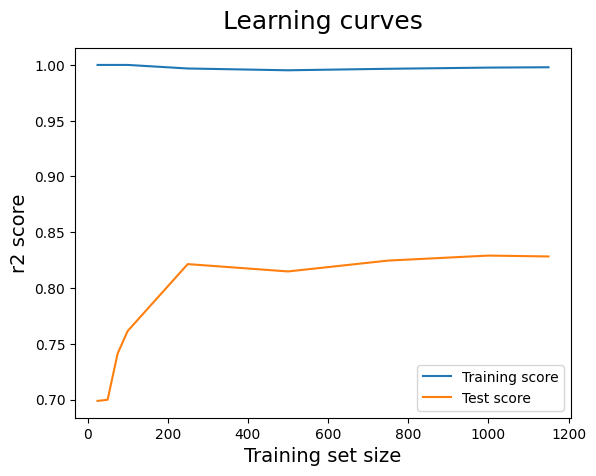

In [26]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=RandomForestClassifier(), X=X_rf, y=y_rf, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

## CatBoost classifier

In [27]:
from catboost import CatBoostClassifier

# Copy data
data_cat = data.copy()

# Encode target
y_cat = data_cat['rating']

# Create feature set
X_cat = data_cat.drop(columns=['rating'])

# Initialize CatBoostClassifier
cat = CatBoostClassifier()

# Ready X's and y's
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.3)

# Fit the model
cat.fit(X_train_cat, y_train_cat)


Learning rate set to 0.015639
0:	learn: 0.6841509	total: 2.49ms	remaining: 2.48s
1:	learn: 0.6755602	total: 4.86ms	remaining: 2.42s
2:	learn: 0.6672717	total: 7.12ms	remaining: 2.37s
3:	learn: 0.6593231	total: 9.36ms	remaining: 2.33s
4:	learn: 0.6515285	total: 11.8ms	remaining: 2.34s
5:	learn: 0.6440984	total: 14ms	remaining: 2.31s
6:	learn: 0.6369494	total: 16.4ms	remaining: 2.33s
7:	learn: 0.6300356	total: 18.7ms	remaining: 2.32s
8:	learn: 0.6234027	total: 20.9ms	remaining: 2.31s
9:	learn: 0.6169288	total: 23.3ms	remaining: 2.31s
10:	learn: 0.6107862	total: 25.5ms	remaining: 2.3s
11:	learn: 0.6048231	total: 27.8ms	remaining: 2.29s
12:	learn: 0.5989571	total: 30.2ms	remaining: 2.29s
13:	learn: 0.5932615	total: 32.4ms	remaining: 2.28s
14:	learn: 0.5877873	total: 34.9ms	remaining: 2.29s
15:	learn: 0.5825772	total: 37.1ms	remaining: 2.28s
16:	learn: 0.5773640	total: 39.4ms	remaining: 2.28s
17:	learn: 0.5725601	total: 41.8ms	remaining: 2.28s
18:	learn: 0.5679147	total: 44.2ms	remaining: 2

223:	learn: 0.3953186	total: 583ms	remaining: 2.02s
224:	learn: 0.3952484	total: 585ms	remaining: 2.02s
225:	learn: 0.3951741	total: 588ms	remaining: 2.01s
226:	learn: 0.3949940	total: 590ms	remaining: 2.01s
227:	learn: 0.3948245	total: 592ms	remaining: 2s
228:	learn: 0.3947247	total: 595ms	remaining: 2s
229:	learn: 0.3946010	total: 597ms	remaining: 2s
230:	learn: 0.3944539	total: 599ms	remaining: 2s
231:	learn: 0.3942276	total: 602ms	remaining: 1.99s
232:	learn: 0.3940194	total: 605ms	remaining: 1.99s
233:	learn: 0.3939055	total: 608ms	remaining: 1.99s
234:	learn: 0.3936665	total: 610ms	remaining: 1.98s
235:	learn: 0.3933906	total: 612ms	remaining: 1.98s
236:	learn: 0.3932377	total: 614ms	remaining: 1.98s
237:	learn: 0.3931682	total: 617ms	remaining: 1.98s
238:	learn: 0.3930854	total: 620ms	remaining: 1.97s
239:	learn: 0.3929026	total: 622ms	remaining: 1.97s
240:	learn: 0.3927968	total: 624ms	remaining: 1.97s
241:	learn: 0.3926572	total: 627ms	remaining: 1.96s
242:	learn: 0.3925355	to

457:	learn: 0.3668688	total: 1.17s	remaining: 1.38s
458:	learn: 0.3668184	total: 1.17s	remaining: 1.38s
459:	learn: 0.3667740	total: 1.17s	remaining: 1.38s
460:	learn: 0.3666977	total: 1.18s	remaining: 1.38s
461:	learn: 0.3666299	total: 1.18s	remaining: 1.37s
462:	learn: 0.3665268	total: 1.18s	remaining: 1.37s
463:	learn: 0.3664001	total: 1.18s	remaining: 1.37s
464:	learn: 0.3663645	total: 1.19s	remaining: 1.36s
465:	learn: 0.3663200	total: 1.19s	remaining: 1.36s
466:	learn: 0.3662240	total: 1.19s	remaining: 1.36s
467:	learn: 0.3661872	total: 1.19s	remaining: 1.36s
468:	learn: 0.3660066	total: 1.2s	remaining: 1.35s
469:	learn: 0.3659658	total: 1.2s	remaining: 1.35s
470:	learn: 0.3657483	total: 1.2s	remaining: 1.35s
471:	learn: 0.3655777	total: 1.21s	remaining: 1.35s
472:	learn: 0.3655241	total: 1.21s	remaining: 1.35s
473:	learn: 0.3652740	total: 1.21s	remaining: 1.34s
474:	learn: 0.3651463	total: 1.21s	remaining: 1.34s
475:	learn: 0.3651113	total: 1.22s	remaining: 1.34s
476:	learn: 0.3

616:	learn: 0.3494081	total: 1.56s	remaining: 967ms
617:	learn: 0.3490812	total: 1.56s	remaining: 965ms
618:	learn: 0.3488937	total: 1.56s	remaining: 963ms
619:	learn: 0.3488492	total: 1.57s	remaining: 960ms
620:	learn: 0.3485564	total: 1.57s	remaining: 957ms
621:	learn: 0.3484293	total: 1.57s	remaining: 955ms
622:	learn: 0.3483860	total: 1.57s	remaining: 952ms
623:	learn: 0.3483411	total: 1.57s	remaining: 949ms
624:	learn: 0.3482936	total: 1.58s	remaining: 947ms
625:	learn: 0.3482281	total: 1.58s	remaining: 944ms
626:	learn: 0.3481872	total: 1.58s	remaining: 942ms
627:	learn: 0.3481370	total: 1.58s	remaining: 939ms
628:	learn: 0.3478130	total: 1.59s	remaining: 937ms
629:	learn: 0.3477797	total: 1.59s	remaining: 934ms
630:	learn: 0.3477178	total: 1.59s	remaining: 932ms
631:	learn: 0.3475389	total: 1.6s	remaining: 930ms
632:	learn: 0.3471875	total: 1.6s	remaining: 927ms
633:	learn: 0.3471353	total: 1.6s	remaining: 925ms
634:	learn: 0.3469220	total: 1.6s	remaining: 923ms
635:	learn: 0.34

847:	learn: 0.3214305	total: 2.14s	remaining: 384ms
848:	learn: 0.3212928	total: 2.15s	remaining: 382ms
849:	learn: 0.3212648	total: 2.15s	remaining: 379ms
850:	learn: 0.3212314	total: 2.15s	remaining: 377ms
851:	learn: 0.3211983	total: 2.15s	remaining: 374ms
852:	learn: 0.3210252	total: 2.16s	remaining: 372ms
853:	learn: 0.3207823	total: 2.16s	remaining: 369ms
854:	learn: 0.3207493	total: 2.16s	remaining: 367ms
855:	learn: 0.3205751	total: 2.16s	remaining: 364ms
856:	learn: 0.3202662	total: 2.17s	remaining: 361ms
857:	learn: 0.3202066	total: 2.17s	remaining: 359ms
858:	learn: 0.3201704	total: 2.17s	remaining: 356ms
859:	learn: 0.3199229	total: 2.17s	remaining: 354ms
860:	learn: 0.3198307	total: 2.17s	remaining: 351ms
861:	learn: 0.3197952	total: 2.18s	remaining: 349ms
862:	learn: 0.3196107	total: 2.18s	remaining: 346ms
863:	learn: 0.3194996	total: 2.18s	remaining: 344ms
864:	learn: 0.3193309	total: 2.19s	remaining: 341ms
865:	learn: 0.3191246	total: 2.19s	remaining: 339ms
866:	learn: 

In [28]:
# Predict
y_pred_cat = cat.predict(X_test_cat)
y_pred_cat

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_cat, y_pred_cat))

ACCURACY OF THE MODEL:  0.8


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_rf, y_train_rf)
clf.score(X_test_rf,y_test_rf)


0.8298245614035088

In [31]:
for index, feat in enumerate(clf.coef_[0]):
    if feat > 1:
        print(index) 

27
415
441
519
612
808
938
1183
1233
1728


In [32]:
X_train_rf.columns[1415]

'Red apple_middle'

# Models fine-tuned

## Random Forest fine-tuned

In [33]:
from sklearn.preprocessing import LabelEncoder
data_rf_tuned = data.copy()

# Prepare X and y
y_rfc_tuned = data_rf_tuned["rating"]
X_rfc_tuned = data_rf_tuned.drop(columns=["rating"])

# Random Forest Classifier
rfc_tuned = RandomForestClassifier(n_estimators = 130,
                                 criterion='gini',
                                 random_state=2,
                                 n_jobs=3,)
                                  #splitter= 'best',
                                  #base_estimator=DecisionTreeClassifier())

# Ready X’s and y’s
X_train_rfc_tuned, X_test_rfc_tuned, y_train_rfc_tuned, y_test_rfc_tuned = train_test_split(X_rfc_tuned, y_rfc_tuned, test_size=0.2)

# Fit the model
rfc_tuned.fit(X_train_rfc_tuned, y_train_rfc_tuned)


#{'criterion': 'gini',
 #'max_features': 1,
 #'max_leaf_nodes': 5,
 #'min_impurity_decrease': 1,
 #'min_samples_leaf': 2,
 #'min_samples_split': 2,
 #'min_weight_fraction_leaf': 0,
 #'random_state': 1,
 #'splitter': 'best'}

RandomForestClassifier(n_estimators=130, n_jobs=3, random_state=2)

In [34]:
X_test_rfc_tuned.loc[252]

Absinthe_top         0.0
Absolute_base        0.0
Absolute_middle      0.0
Absolute_top         0.0
Accord_base          0.0
                    ... 
Ylangtincture_top    0.0
Yuzu_middle          0.0
Yuzu_top             0.0
Zefir_top            0.0
Zest_top             0.0
Name: 252, Length: 1935, dtype: float64

In [35]:
y_pred_rfc_tuned = rfc_tuned.predict(X_test_rfc_tuned)
y_pred_rfc_tuned

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_rfc_tuned, y_pred_rfc_tuned))

ACCURACY OF THE MODEL:  0.8223684210526315


In [37]:
import pickle

filename = open('test_model.pkl', 'wb')
pickle.dump(rfc_tuned, filename)
filename.close()

In [40]:
import os  
os.makedirs('/home/tiago/code/thibaultdiers/project_fragrance/websiteperfume', exist_ok=True)  
X_test_rfc_tuned.to_csv('/home/tiago/code/thibaultdiers/project_fragrance/websiteperfume/X_test.csv',index=False)

In [41]:
X_t = pd.read_csv('X_test.csv')
X_t.iloc[0]

Absinthe_top         0.0
Absolute_base        0.0
Absolute_middle      0.0
Absolute_top         0.0
Accord_base          0.0
                    ... 
Ylangtincture_top    0.0
Yuzu_middle          0.0
Yuzu_top             0.0
Zefir_top            0.0
Zest_top             0.0
Name: 0, Length: 1935, dtype: float64

In [39]:
!pwd

/home/tiago/code/thibaultdiers/project_fragrance/websiteperfume
